In [69]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [70]:
ds=pd.read_csv('dairy_product.csv')
ds.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [71]:
ds.columns

Index(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'],
      dtype='object')

In [72]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [73]:
ds.describe()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
count,8618.000000,8618.000000,8618.00000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,...,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,15467.757368,226.438617,11.52391,10.647024,21.819062,6.560253,2.023242,93.968786,0.264369,1.225260,...,0.125765,0.213222,0.182499,0.174881,0.061176,0.000191,0.077965,0.222838,0.229363,0.179111
std,9221.428766,169.388910,10.55059,15.866353,27.239000,13.602098,4.313670,779.362205,0.478614,4.319183,...,0.466402,0.302161,0.346062,0.431974,0.167803,0.000615,0.133496,0.290133,0.514406,0.305292
min,1001.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8695.250000,93.000000,2.47000,0.992500,0.040000,0.000000,0.000000,0.000000,0.034250,0.000000,...,0.000000,0.023875,0.035385,0.025000,0.007500,0.000033,0.023810,0.052857,0.001818,0.020909
50%,14273.000000,191.000000,8.28500,5.235000,8.945000,0.370000,0.300000,1.500000,0.120000,0.080000,...,0.017500,0.131250,0.115385,0.064583,0.015833,0.000088,0.047619,0.190000,0.070909,0.076818
75%,20050.750000,336.000000,19.97750,13.900000,32.900000,5.300000,2.400000,21.000000,0.355000,1.297500,...,0.062500,0.314328,0.200000,0.185833,0.051667,0.000161,0.069048,0.308571,0.387273,0.245455
max,93600.000000,902.000000,88.32000,100.000000,100.000000,99.800000,79.000000,30000.000000,12.000000,98.890000,...,14.702500,7.968750,13.461538,19.479167,6.136667,0.016722,1.859524,14.168571,34.854545,8.268182


In [75]:
ds.isnull().sum()*100/len(ds)

ID                   0.000000
FoodGroup            0.000000
ShortDescrip         0.000000
Descrip              0.000000
CommonName          87.665352
MfgName             81.898352
ScientificName      91.506150
Energy_kcal          0.000000
Protein_g            0.000000
Fat_g                0.000000
Carb_g               0.000000
Sugar_g              0.000000
Fiber_g              0.000000
VitA_mcg             0.000000
VitB6_mg             0.000000
VitB12_mcg           0.000000
VitC_mg              0.000000
VitE_mg              0.000000
Folate_mcg           0.000000
Niacin_mg            0.000000
Riboflavin_mg        0.000000
Thiamin_mg           0.000000
Calcium_mg           0.000000
Copper_mcg           0.000000
Iron_mg              0.000000
Magnesium_mg         0.000000
Manganese_mg         0.000000
Phosphorus_mg        0.000000
Selenium_mcg         0.000000
Zinc_mg              0.000000
VitA_USRDA           0.000000
VitB6_USRDA          0.000000
VitB12_USRDA         0.000000
VitC_USRDA

In [74]:
categorical_columns = ds.select_dtypes(include=['object']).columns
categorical_columns



Index(['FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName'],
      dtype='object')

In [76]:
ds.CommonName.isnull().sum()

7555

In [77]:
ds.drop(['CommonName', 'MfgName','ScientificName'], axis=1, inplace=True)


In [78]:
ds.head()

,ID,FoodGroup,ShortDescrip,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",717.0,0.85,81.11,0.06,0.06,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",717.0,0.85,81.11,0.06,0.06,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",876.0,0.28,99.48,0.00,0.00,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",353.0,21.40,28.74,2.34,0.50,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",371.0,23.24,29.68,2.79,0.51,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [79]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   Energy_kcal       8618 non-null   float64
 5   Protein_g         8618 non-null   float64
 6   Fat_g             8618 non-null   float64
 7   Carb_g            8618 non-null   float64
 8   Sugar_g           8618 non-null   float64
 9   Fiber_g           8618 non-null   float64
 10  VitA_mcg          8618 non-null   float64
 11  VitB6_mg          8618 non-null   float64
 12  VitB12_mcg        8618 non-null   float64
 13  VitC_mg           8618 non-null   float64
 14  VitE_mg           8618 non-null   float64
 15  Folate_mcg        8618 non-null   float64
 16  Niacin_mg         8618 non-null   float64


In [110]:
cat=ds[['FoodGroup','ShortDescrip','Descrip']]
cat.sample(10)

,FoodGroup,ShortDescrip,Descrip
8347,18,6888,"Restaurant, Latino, pupusas del cerdo (pupusas..."
872,17,2886,"Chicken, broilers or fryers, drumstick, meat o..."
4677,10,3334,"Crustaceans, crab, queen, cooked, moist heat"
4122,3,865,"Beef, flank, steak, separable lean and fat, tr..."
5733,2,5483,"Muffins, plain, prepared from recipe, made wit..."
4792,13,5491,"Mung beans, mature seeds, raw"
3738,15,7209,"Seeds, sesame seed kernels, dried (decorticated)"
4312,4,5057,"Lemonade, powder, prepared with water"
4734,13,515,"Beans, cranberry (roman), mature seeds, canned"
387,1,340,"Babyfood, fruit, applesauce with banana, junior"


In [81]:
ds.head()

,ID,FoodGroup,ShortDescrip,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",717.0,0.85,81.11,0.06,0.06,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",717.0,0.85,81.11,0.06,0.06,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",876.0,0.28,99.48,0.00,0.00,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",353.0,21.40,28.74,2.34,0.50,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",371.0,23.24,29.68,2.79,0.51,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [82]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   Energy_kcal       8618 non-null   float64
 5   Protein_g         8618 non-null   float64
 6   Fat_g             8618 non-null   float64
 7   Carb_g            8618 non-null   float64
 8   Sugar_g           8618 non-null   float64
 9   Fiber_g           8618 non-null   float64
 10  VitA_mcg          8618 non-null   float64
 11  VitB6_mg          8618 non-null   float64
 12  VitB12_mcg        8618 non-null   float64
 13  VitC_mg           8618 non-null   float64
 14  VitE_mg           8618 non-null   float64
 15  Folate_mcg        8618 non-null   float64
 16  Niacin_mg         8618 non-null   float64


In [83]:
categorical_columns

Index(['FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName'],
      dtype='object')

In [84]:
le = preprocessing.LabelEncoder()
ds['FoodGroup'] = le.fit_transform(ds['FoodGroup'].values)

In [85]:
ds['ShortDescrip']=le.fit_transform(ds['ShortDescrip'].values)

In [86]:
ds['Decrip']=le.fit_transform(ds['Descrip'].values)

In [87]:
ds.head()

,ID,FoodGroup,ShortDescrip,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,...,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA,Decrip
0,1001,7,1842,"Butter, salted",717.0,0.85,81.11,0.06,0.06,0.0,...,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182,1816
1,1002,7,1841,"Butter, whipped, with salt",717.0,0.85,81.11,0.06,0.06,0.0,...,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545,1817
2,1003,7,1837,"Butter oil, anhydrous",876.0,0.28,99.48,0.00,0.00,0.0,...,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909,1812
3,1004,7,2701,"Cheese, blue",353.0,21.40,28.74,2.34,0.50,0.0,...,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818,2665
4,1005,7,2702,"Cheese, brick",371.0,23.24,29.68,2.79,0.51,0.0,...,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364,2666


In [88]:
ds.FoodGroup.sample(20)

4537    10
7897     2
3093    24
3494    24
5891     2
3760    15
678      9
1985     5
4313     4
6762     8
2709    16
4726    13
3676    15
1976     5
7503     3
4003     3
4736    13
2694    16
4214     4
2256    11
Name: FoodGroup, dtype: int32

In [89]:
x=ds.drop(['ID','FoodGroup'],axis=1)
x.shape

(8618, 41)

In [90]:
y=ds['FoodGroup']
y.shape

(8618,)

In [91]:
x.isnull().sum()*100/len(x)

ShortDescrip        0.0
Descrip             0.0
Energy_kcal         0.0
Protein_g           0.0
Fat_g               0.0
Carb_g              0.0
Sugar_g             0.0
Fiber_g             0.0
VitA_mcg            0.0
VitB6_mg            0.0
VitB12_mcg          0.0
VitC_mg             0.0
VitE_mg             0.0
Folate_mcg          0.0
Niacin_mg           0.0
Riboflavin_mg       0.0
Thiamin_mg          0.0
Calcium_mg          0.0
Copper_mcg          0.0
Iron_mg             0.0
Magnesium_mg        0.0
Manganese_mg        0.0
Phosphorus_mg       0.0
Selenium_mcg        0.0
Zinc_mg             0.0
VitA_USRDA          0.0
VitB6_USRDA         0.0
VitB12_USRDA        0.0
VitC_USRDA          0.0
VitE_USRDA          0.0
Folate_USRDA        0.0
Niacin_USRDA        0.0
Riboflavin_USRDA    0.0
Thiamin_USRDA       0.0
Calcium_USRDA       0.0
Copper_USRDA        0.0
Magnesium_USRDA     0.0
Phosphorus_USRDA    0.0
Selenium_USRDA      0.0
Zinc_USRDA          0.0
Decrip              0.0
dtype: float64

In [92]:
x_org=x.copy()

In [93]:
x.var()

C:\Users\admin\AppData\Local\Temp\ipykernel_1312\2968726291.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  x.var()


ShortDescrip        6.185080e+06
Energy_kcal         2.869260e+04
Protein_g           1.113149e+02
Fat_g               2.517411e+02
Carb_g              7.419631e+02
Sugar_g             1.850171e+02
Fiber_g             1.860775e+01
VitA_mcg            6.074054e+05
VitB6_mg            2.290714e-01
VitB12_mcg          1.865534e+01
VitC_mg             3.315774e+03
VitE_mg             1.481502e+01
Folate_mcg          3.480488e+04
Niacin_mg           2.337308e+01
Riboflavin_mg       2.023920e-01
Thiamin_mg          2.687065e-01
Calcium_mg          4.054732e+04
Copper_mcg          3.058670e-01
Iron_mg             3.279815e+01
Magnesium_mg        3.143672e+03
Manganese_mg        4.074828e+01
Phosphorus_mg       4.124686e+04
Selenium_mcg        8.004569e+02
Zinc_mg             1.127759e+01
VitA_USRDA          7.498833e-01
VitB6_USRDA         7.926347e-02
VitB12_USRDA        3.238774e+00
VitC_USRDA          4.093548e-01
VitE_USRDA          6.584452e-02
Folate_USRDA        2.175305e-01
Niacin_USR

In [94]:
x_v = x/x.mean()
x_v.var()

C:\Users\admin\AppData\Local\Temp\ipykernel_1312\234114846.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  x_v = x/x.mean()


Calcium_USRDA         7.523775
Calcium_mg            7.523775
Carb_g                1.558512
Copper_USRDA         10.317163
Copper_mcg           10.317163
Decrip                0.333449
Descrip                    NaN
Energy_kcal           0.559589
Fat_g                 2.220740
Fiber_g               4.545673
Folate_USRDA         13.753041
Folate_mcg           13.753041
Iron_mg               4.509842
Magnesium_USRDA       2.931833
Magnesium_mg          2.931833
Manganese_mg        160.136991
Niacin_USRDA          2.008214
Niacin_mg             2.008214
Phosphorus_USRDA      1.695188
Phosphorus_mg         1.695188
Protein_g             0.838212
Riboflavin_USRDA      3.595733
Riboflavin_mg         3.595733
Selenium_USRDA        5.029991
Selenium_mcg          5.029991
ShortDescrip          0.333575
Sugar_g               4.299032
Thiamin_USRDA         6.101428
Thiamin_mg            6.101428
VitA_USRDA           68.787804
VitA_mcg             68.787804
VitB12_USRDA         12.426439
VitB12_m

In [95]:
x_v.var()>0.03

Calcium_USRDA        True
Calcium_mg           True
Carb_g               True
Copper_USRDA         True
Copper_mcg           True
Decrip               True
Descrip             False
Energy_kcal          True
Fat_g                True
Fiber_g              True
Folate_USRDA         True
Folate_mcg           True
Iron_mg              True
Magnesium_USRDA      True
Magnesium_mg         True
Manganese_mg         True
Niacin_USRDA         True
Niacin_mg            True
Phosphorus_USRDA     True
Phosphorus_mg        True
Protein_g            True
Riboflavin_USRDA     True
Riboflavin_mg        True
Selenium_USRDA       True
Selenium_mcg         True
ShortDescrip         True
Sugar_g              True
Thiamin_USRDA        True
Thiamin_mg           True
VitA_USRDA           True
VitA_mcg             True
VitB12_USRDA         True
VitB12_mcg           True
VitB6_USRDA          True
VitB6_mg             True
VitC_USRDA           True
VitC_mg              True
VitE_USRDA           True
VitE_mg     

In [96]:
x = x.loc[:,x_v.var()>0.03] # columns having morehan 0.03 variance will be printed only
x.shape

(8618, 40)

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 29)
# using random forest to find out most importtrant features.
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf.feature_importances_ 

array([0.06869865, 0.03836725, 0.04464183, 0.03479905, 0.06949623,
       0.02262563, 0.02531511, 0.01125387, 0.01875103, 0.02249749,
       0.02225256, 0.01024307, 0.01727547, 0.02226041, 0.01485467,
       0.02366739, 0.01817526, 0.01577992, 0.02419919, 0.01904293,
       0.02425858, 0.01537417, 0.02185967, 0.02640246, 0.01045617,
       0.01711149, 0.02406245, 0.01990913, 0.01109657, 0.01811278,
       0.02458652, 0.01455861, 0.02528831, 0.01838011, 0.01529034,
       0.0181414 , 0.01698926, 0.02001654, 0.02812515, 0.0857833 ])

In [98]:
rf_feat = pd.Series(rf.feature_importances_, index= x_train.columns)
rf_feat

ShortDescrip        0.068699
Energy_kcal         0.038367
Protein_g           0.044642
Fat_g               0.034799
Carb_g              0.069496
Sugar_g             0.022626
Fiber_g             0.025315
VitA_mcg            0.011254
VitB6_mg            0.018751
VitB12_mcg          0.022497
VitC_mg             0.022253
VitE_mg             0.010243
Folate_mcg          0.017275
Niacin_mg           0.022260
Riboflavin_mg       0.014855
Thiamin_mg          0.023667
Calcium_mg          0.018175
Copper_mcg          0.015780
Iron_mg             0.024199
Magnesium_mg        0.019043
Manganese_mg        0.024259
Phosphorus_mg       0.015374
Selenium_mcg        0.021860
Zinc_mg             0.026402
VitA_USRDA          0.010456
VitB6_USRDA         0.017111
VitB12_USRDA        0.024062
VitC_USRDA          0.019909
VitE_USRDA          0.011097
Folate_USRDA        0.018113
Niacin_USRDA        0.024587
Riboflavin_USRDA    0.014559
Thiamin_USRDA       0.025288
Calcium_USRDA       0.018380
Copper_USRDA  

In [99]:
x = x.loc[:, rf_feat>0.01]
x.shape

(8618, 40)

In [100]:
x_cor = x.corr()>0.8

In [101]:
x_cor

,ShortDescrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA,Decrip
ShortDescrip,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
Energy_kcal,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Protein_g,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Fat_g,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Carb_g,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sugar_g,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Fiber_g,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
VitA_mcg,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
VitB6_mg,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
VitB12_mcg,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [102]:
x_cor_cols = ['ShortDescrip', 'Descrip', 'Energy_kcal', 'Protein_g', 'Fat_g',
       'Carb_g', 'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg',
       'VitC_mg', 'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg',
       'Thiamin_mg', 'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg',
       'Manganese_mg', 'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg',
       'VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA',
       'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA',
       'Calcium_USRDA', 'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA',
       'Selenium_USRDA', 'Zinc_USRDA']

In [103]:
x_cor['ShortDescrip']

ShortDescrip         True
Energy_kcal         False
Protein_g           False
Fat_g               False
Carb_g              False
Sugar_g             False
Fiber_g             False
VitA_mcg            False
VitB6_mg            False
VitB12_mcg          False
VitC_mg             False
VitE_mg             False
Folate_mcg          False
Niacin_mg           False
Riboflavin_mg       False
Thiamin_mg          False
Calcium_mg          False
Copper_mcg          False
Iron_mg             False
Magnesium_mg        False
Manganese_mg        False
Phosphorus_mg       False
Selenium_mcg        False
Zinc_mg             False
VitA_USRDA          False
VitB6_USRDA         False
VitB12_USRDA        False
VitC_USRDA          False
VitE_USRDA          False
Folate_USRDA        False
Niacin_USRDA        False
Riboflavin_USRDA    False
Thiamin_USRDA       False
Calcium_USRDA       False
Copper_USRDA        False
Magnesium_USRDA     False
Phosphorus_USRDA    False
Selenium_USRDA      False
Zinc_USRDA  

In [104]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)  

In [105]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [106]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)  
X_train = lda.fit_transform(X_train, y_train)  
X_test = lda.transform(X_test) 

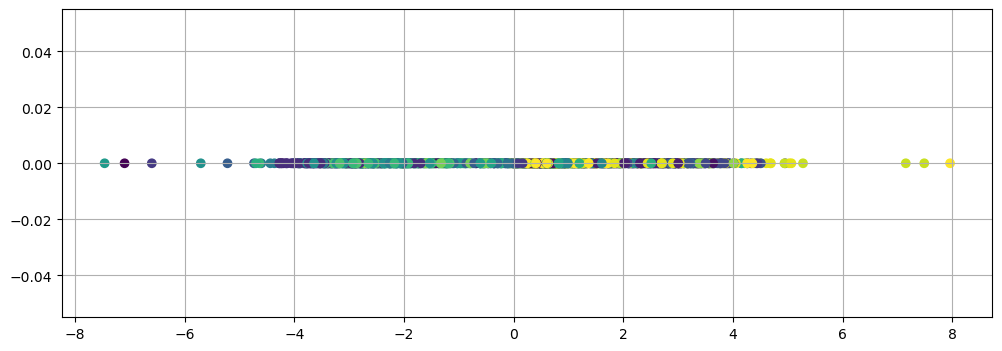

In [107]:
plt.figure(figsize=(12,4))
plt.scatter(X_test, np.zeros(len(X_test)), c=y_test)
plt.grid()
plt.show()

In [108]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=1)
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test) 

In [109]:
from sklearn.metrics import accuracy_score
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

Accuracy: 0.2308584686774942
